In [139]:
import pandas as pd
import numpy as np
import pydicom as dicom
import os
import matplotlib.pyplot as plt
import cv2
import math
import scipy
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Reduced Image pixel size and the depth to process data without cloud
IMG_PXL_SIZE = 50
HM_SLICES = 20

In [4]:
data_labels = pd.read_csv('./Lung1.clinical.csv',index_col=0)
data_dir = 'C:/Users/Daniel/Desktop/NSCLC-Radiomics/patients/'
patients = os.listdir(data_dir)


In [165]:
data_labels.head()

,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
PatientID,,,,,,,,,
LUNG1-001,78.7515,2.0,3,0,IIIb,large cell,male,2165,1
LUNG1-002,83.8001,2.0,0,0,I,squamous cell carcinoma,male,155,1
LUNG1-003,68.1807,2.0,3,0,IIIb,large cell,male,256,1
LUNG1-004,70.8802,2.0,1,0,II,squamous cell carcinoma,male,141,1
LUNG1-005,80.4819,4.0,2,0,IIIb,squamous cell carcinoma,male,353,1


In [170]:
data_labels['Overall.Stage'].value_counts()

IIIb    176
IIIa    112
I        93
II       40
Name: Overall.Stage, dtype: int64

In [172]:
stage3a_and_3b =  data_labels['Overall.Stage'].value_counts()[0] + data_labels['Overall.Stage'].value_counts()[1]
stage1_and_2 = data_labels['Overall.Stage'].value_counts()[2] + data_labels['Overall.Stage'].value_counts()[3]
print(stage3a_and_3b)
print(stage1_and_2)

288
133


In [6]:

# Function to break a list of slices into chunks of lists
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]



In [7]:
def mean(l):
    return sum(l)/len(l)

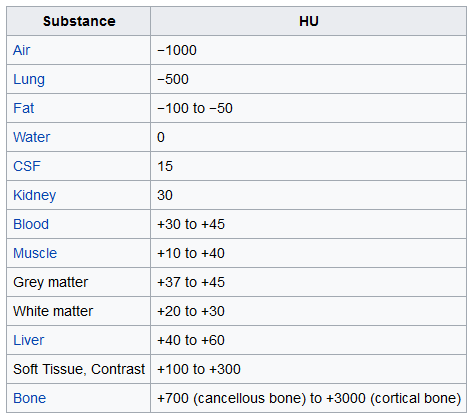

# Function to limit depth

This function will limit the depth of 3-D CT Scans to 20 slices. 

In [137]:
# Function to process data
def process_data(patient, data_labels, img_pxl_size=20, hm_slices=20, vizualize = False):

    label = data_labels.get_value(patient,'Overall.Stage')
    path = data_dir + patient
    _, __, files = os.walk(path)
    slices = [dicom.read_file(files[0] + '/' + s) for s in os.listdir(files[0])]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    #print(len(slices), label)
    #print(slices[0])
    #plt.imshow(slices[0].pixel_array)
    #plt.show()

    new_slices = []

    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PXL_SIZE,IMG_PXL_SIZE)) for each_slice in slices]

    chunk_sizes = math.ceil(len(slices) / HM_SLICES)



    for slice_chunk in chunks(slices,chunk_sizes):
        slice_chunk = list(map(mean, zip(*slice_chunk)))
        new_slices.append(slice_chunk)


    if len(new_slices) == HM_SLICES-1:
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

#     if len(new_slices) == HM_SLICES+2:
#         new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES]])))
#         del new_slices[HM_SLICES]
#         new_slices[HM_SLICES-1] = new_val

#     if len(new_slices) == HM_SLICES+1:
#         new_val = list(map(mean, zip(*[new_slices[HM_SLICES-1],new_slices[HM_SLICES]])))
#         del new_slices[HM_SLICES]
#         new_slices[HM_SLICES-1] = new_val


    if vizualize:
        fig = plt.figure()
        for num,each_slice in enumerate(slices[:12]):
            y = fig.add_subplot(4,5,num+1)
            #new_image = scipy.misc.imresize(np.array(each_slice.pixel_array),(IMG_PXL_SIZE,IMG_PXL_SIZE))
            #y.imshow(slices[0].pixel_array)
            #y.imshow(each_slice)

        plt.show()

    if label == 'I' or label == 'II': 
        label = np.array([0,1])
    else:
#     elif label == 'IIIa' or label == 'IIIb': 
        label = np.array([1,0])

    return np.array(new_slices), label

# Function to process CT Scans and save them as #-Dimensional Arrays forneural network



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


134 IIIb
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.41277525157876544037153507755141737313
(0008, 0020) Study Date                          DA: '20080918'
(0008, 0021) Series Date                         DA: '20080918'
(0008, 0022) Acquisition Date                    DA: '20080918'
(0008, 0023) Content Date                        DA: '20080918'
(0008, 0030) Study Time                          TM: '110915.625000'
(0008, 0031) Series Time                         TM: '121748.328000'
(0008, 0032) Acquisition Time                    TM: '113944.541817'
(0008, 0033) Content Time                        TM: '113944.541817'
(0008, 0050) Accession Number                    SH: '2819497684894126'
(0008, 0060) Modality             

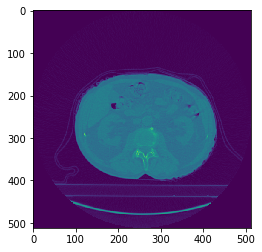

In [124]:
for patient in patients[:1]:
    label = data_labels.get_value(patient,'Overall.Stage')
    path = data_dir + patient
    _, __, files = os.walk(path)
    slices = [dicom.read_file(files[0] + '/' + s) for s in os.listdir(files[0])]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    print(len(slices), label)
    print(slices[0])
    plt.imshow(slices[0].pixel_array)
    plt.show()


In [131]:
slices[0].ImagePositionPatient

[-249.51171875, -460.51171875, -681.5]

In [133]:
slices[0].pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [105]:
# Save processed data in a list

arrays2 = []
labels2 = []


for num, patient in enumerate(patients):
        if num%50 == 0:
            print(num)

        try:
            img_data, label = process_data(patient, data_labels, img_pxl_size=IMG_PXL_SIZE, hm_slices=HM_SLICES)
            if img_data.shape[0] == 20:
                arrays2.append(img_data)
                labels2.append(label)
                print(img_data.shape, label)
            else:
                print("num skipped")

        except KeyError as e:
            
            print(img_data.shape , '\tThis is unlabeled data')

np.save('arrays2-{}-{}-{}.npy'.format(IMG_PXL_SIZE,IMG_PXL_SIZE,HM_SLICES), arrays2)
np.save('labels2-{}-{}-{}.npy'.format(IMG_PXL_SIZE,IMG_PXL_SIZE,HM_SLICES), labels2)
print('Finished processing')

0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
num skipped
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
num skipped
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
num skipped
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
50
(20, 50, 50) [0 1]
(20, 50, 50) [1 0]
(20, 50, 50) [0 1]
(20, 50, 50

In [103]:
arrays_stack = np.stack(arrays2)
labels_stack = np.stack(labels2)

ValueError: all input arrays must have the same shape

In [98]:
arrays_stack

(411, 20, 50, 50)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(arrays2, labels2, test_size=0.30, random_state=42, stratify = labels2)

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D
from keras.utils import np_utils

In [142]:
# Instantiate a CNN.
cnn_model = Sequential()

# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 16,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(20,50,50))) # shape of input (image)

# Add a pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model.add(Conv2D(64,
                       kernel_size = 3,
                       activation='relu'))

# Add another pooling layer.
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model.add(Dense(64, activation='relu'))

# Prevent overfitting
cnn_model.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model.add(Dense(32, activation='relu'))

# Prevent overfitting
cnn_model.add(Dropout(0.5))

# Add a final layer with 2 neurons.
cnn_model.add(Dense(2, activation='sigmoid'))

# Compile model
cnn_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])



In [143]:
cnn_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 18, 48, 16)        7216      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 9, 24, 16)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 22, 64)         9280      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 3, 11, 64)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2112)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                135232    
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)              

In [109]:
trial = np.stack(X_train)

In [110]:
trial.shape

(287, 20, 50, 50)

In [112]:
trial[0].shape

(20, 50, 50)

In [151]:
# Fit model on training data
history = cnn_model.fit(np.stack(X_train),
                          np.stack(y_train),
                          batch_size=32,
                          validation_data=(np.stack(X_test), np.stack(y_test)),
                          epochs=10,
                          verbose=1)

Train on 287 samples, validate on 124 samples
Epoch 1/10
287/287 [==============================] - 1s 5ms/step - loss: 7.5703 - accuracy: 0.5279 - val_loss: 4.9125 - val_accuracy: 0.6935
Epoch 2/10
287/287 [==============================] - 2s 6ms/step - loss: 7.7182 - accuracy: 0.5174 - val_loss: 4.9125 - val_accuracy: 0.6935
Epoch 3/10
287/287 [==============================] - 1s 5ms/step - loss: 7.5095 - accuracy: 0.5314 - val_loss: 4.9125 - val_accuracy: 0.6935
Epoch 4/10
287/287 [==============================] - 1s 5ms/step - loss: 7.8489 - accuracy: 0.5105 - val_loss: 4.9125 - val_accuracy: 0.6935
Epoch 5/10
287/287 [==============================] - 1s 5ms/step - loss: 7.1497 - accuracy: 0.5540 - val_loss: 4.9125 - val_accuracy: 0.6935
Epoch 6/10
287/287 [==============================] - 1s 5ms/step - loss: 7.1715 - accuracy: 0.5523 - val_loss: 4.9125 - val_accuracy: 0.6935
Epoch 7/10
287/287 [==============================] - 2s 5ms/step - loss: 7.2362 - accuracy: 0.5470 - 

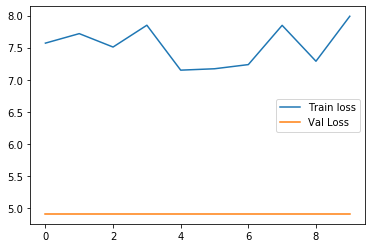

In [152]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

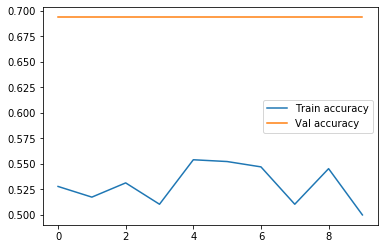

In [153]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();